<a href="https://colab.research.google.com/github/ma23m017/Time_Series/blob/main/Holt's_Linear_Trend_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

In [5]:
df = pd.read_csv('/content/airline_passengers.csv', index_col='Month', parse_dates=True)

In [6]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
holt = Holt(df['Passengers'], initialization_method='legacy-heuristic')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [9]:
res_h = holt.fit()

In [11]:
df['Holt'] = res_h.fittedvalues

<Axes: xlabel='Month'>

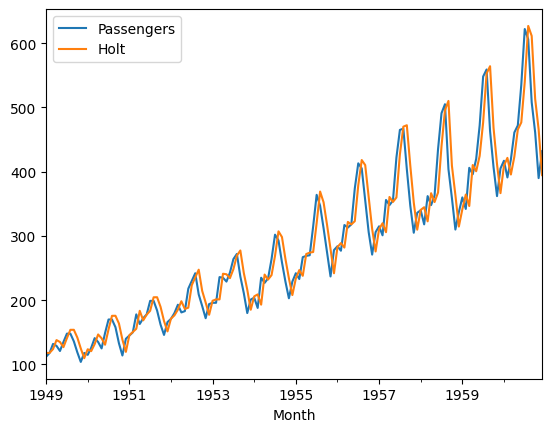

In [12]:
df[['Passengers','Holt']].plot()

In [13]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [17]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [18]:
holt = Holt(train['Passengers'], initialization_method='legacy-heuristic')
res_h = holt.fit()
df.loc[train_idx, 'Holt'] = res_h.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [19]:
df.loc[test_idx, 'Holt'] = res_h.forecast(N_test)

<Axes: xlabel='Month'>

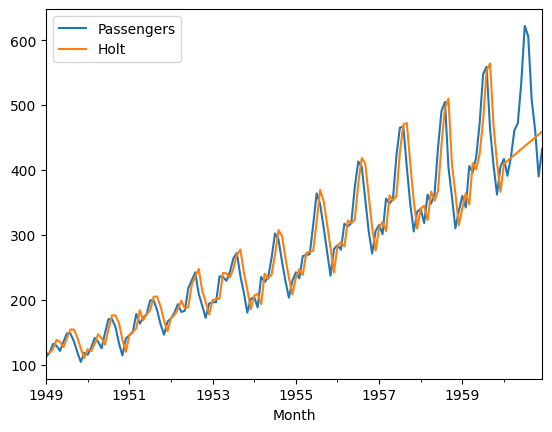

In [20]:
df[['Passengers','Holt']].plot()